# data cleaning
We know that Pandas will recognize “NA” as a missing value, but what about the others? 
If there’s multiple users manually entering data, then this is a common problem. 
Maybe i like to use “n/a” but you like to use “unkown”.
We will also drop columns that are not used like, US DVD Sales, MPAA Rating etc.
We will then turn the "Worldwide Gross" column into a numeric type so pandas can make a histogram out of it.

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt

missing_values = ["n/a", "na", "--","unknown","Unknown","0"]

movie_data = pd.read_csv("movies.csv",na_values = missing_values)

to_drop =['US DVD Sales',
         'MPAA Rating',
         'Running Time (min)',
         'Distributor',
         'Source',
         'Creative Type']

new_names =  {'Worldwide Gross': 'w_gross',
             'Production Budget':'p_budget',
             'Major Genre': 'm_genre',
             'IMDB Votes':'imdb_votes',
             'IMDB Rating':'imdb_rating',
             'Rotten Tomatoes Rating': 'tomatoes'}


#drop unnecessary columns
movie_data.drop(to_drop, inplace=True, axis=1)

#rename columns, some commands cant handle variables with spaces
movie_data.rename(columns=new_names, inplace=True)

# #replace 0 with NaN in w_gross columns, a movie can have zero incomes
# movie_data['w_gross'].replace('0', np.nan)

#transform strings to numeric
movie_data["w_gross"] = pd.to_numeric(movie_data["w_gross"])

#fill all blank cells of the dataframe with numpy's NaN
movie_data.replace('', np.nan, inplace=True)



# plotting the histograms
with the first graphs we can see that there is a clear corellation between the Worldwide Gross and the number of IMDB Votes as they clearly follow a geometric distribution.

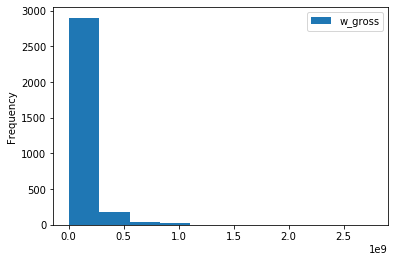

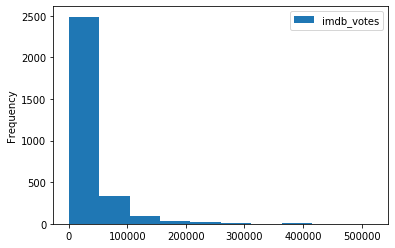

In [2]:
movie_data.plot.hist(y='w_gross') 
movie_data.plot.hist(y='imdb_votes')


The "Rotten tomatoes rating" somehow resembles a uniform distribution with a peak and at the value 90 and a bottom at value 10. The 

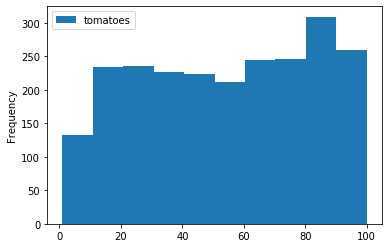

In [3]:
movie_data.plot.hist(y='tomatoes')

The "IMDB rating" follows a left-skewed distribution. The mean is to the left of the peak. This is the main definition behind “skewness”, which is technically a measure of the distribution of values around the mean.

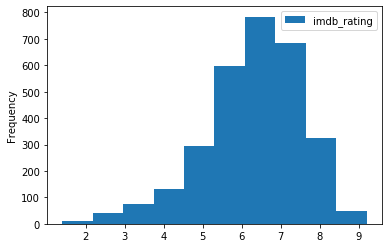

In [4]:
movie_data.plot.hist(y='imdb_rating')


# counting the number of movies for every major genre
Its clear that the most popular genres are drama and comedy.


Drama                  789
Comedy                 675
Action                 420
Adventure              274
Thriller/Suspense      239
Horror                 219
Romantic Comedy        137
Musical                 53
Documentary             43
Black Comedy            36
Western                 36
Concert/Performance      5
Name: m_genre, dtype: int64


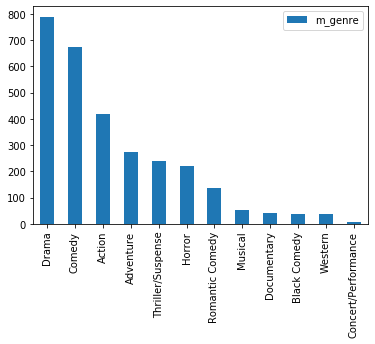

In [5]:
# Count unique values in column 'm_genre' of the dataframe
genres_count_values = movie_data['m_genre'].value_counts()

# Value table
print(genres_count_values)

# Make a pandas dataframe out of the pandas series
genres_count_dataframe = pd.DataFrame(genres_count_values)

# Plot the graph
genres_count_dataframe.plot.bar()


# log-log plot

We will define some bins with exponential increasing size. We will use the numpy.logspace that returns an evenly space logarithmic sequence of numbers. Using the base=N keyword argument we can set the base of the exponent. For example if we get the imdb_votes column the minimum is 18 and the maximum is 519541. If we want to bin the entire set with an exponential growth of numbers from the minimum to the maximum value with a base of 10 we have 51 bins. That's not readable.

minimum value of the imdb_votes:18.0
maximum value of the imdb_votes:519541.0
Exponential increasing bins to include the data range: [18, 22, 27, 33, 41, 51, 63, 78, 96, 118, 146, 180, 222, 274, 338, 417, 514, 634, 783, 965, 1190, 1468, 1810, 2233, 2753, 3395, 4187, 5164, 6368, 7853, 9684, 11943, 14728, 18162, 22397, 27620, 34061, 42003, 51798, 63877, 78772, 97140, 119791, 147725, 182172, 224651, 277036, 341636, 421300, 519540]


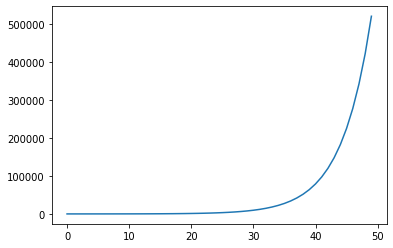

Mean values: [20, 24, 30, 37, 46, 57, 70, 87, 107, 132, 163, 201, 248, 306, 377, 465, 574, 708, 874, 1077, 1329, 1639, 2021, 2493, 3074, 3791, 4675, 5766, 7110, 8768, 10813, 13335, 16445, 20279, 25008, 30840, 38032, 46900, 57837, 71324, 87956, 108465, 133758, 164948, 203411, 250843, 309336, 381468, 470420]


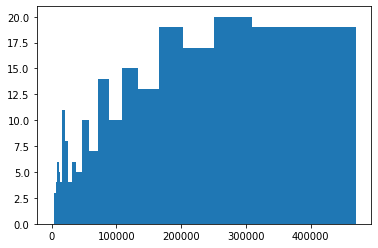

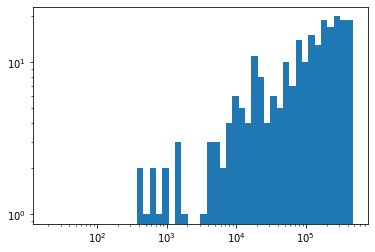

In [6]:
min_value_imdb_votes = movie_data['imdb_votes'].min()
max_value_imdb_votes = movie_data['imdb_votes'].max()

print('minimum value of the imdb_votes:'+str(min_value_imdb_votes))
print('maximum value of the imdb_votes:'+str(max_value_imdb_votes))

#generate sequence of exponentially increasing numbers

end_value = np.log(max_value_imdb_votes)/np.log(min_value_imdb_votes)

exponential_bins = np.logspace(1,end_value,base=min_value_imdb_votes).astype(int)
exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
exponential_bins = list(exponential_bins)
mean_values = list(mean_values)

print('Mean values:',mean_values)


#mean values as input for bucket limits
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.show()
#in a log-log scale
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.yscale('log')
plt.xscale('log')
plt.show()

## doing the same for the w_gross column

minimum value of the w_gross:401.0
maximum value of the w_gross:2767891499.0
Exponential increasing bins to include the data range: [401, 552, 762, 1051, 1450, 1999, 2757, 3803, 5244, 7232, 9973, 13754, 18967, 26156, 36069, 49741, 68594, 94593, 130446, 179888, 248070, 342094, 471756, 650563, 897141, 1237178, 1706098, 2352748, 3244494, 4474232, 6170070, 8508668, 11733650, 16180974, 22313936, 30771433, 42434515, 58518174, 80697911, 111284279, 153463586, 211629822, 291842402, 402457399, 554998028, 765355072, 1055442283, 1455479233, 2007139406, 2767891499]


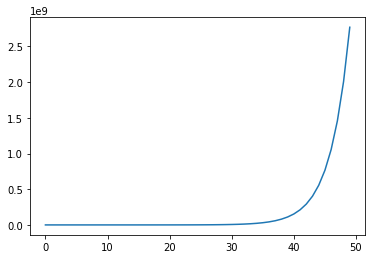

Mean values: [476, 657, 906, 1250, 1724, 2378, 3280, 4523, 6238, 8602, 11863, 16360, 22561, 31112, 42905, 59167, 81593, 112519, 155167, 213979, 295082, 406925, 561159, 773852, 1067159, 1471638, 2029423, 2798621, 3859363, 5322151, 7339369, 10121159, 13957312, 19247455, 26542684, 36602974, 50476344, 69608042, 95991095, 132373932, 182546704, 251736112, 347149900, 478727713, 660176550, 910398677, 1255460758, 1731309319, 2387515452]


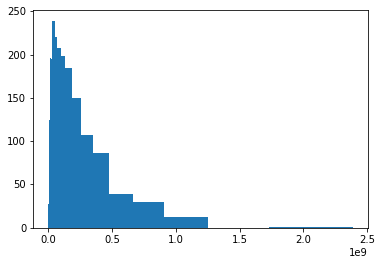

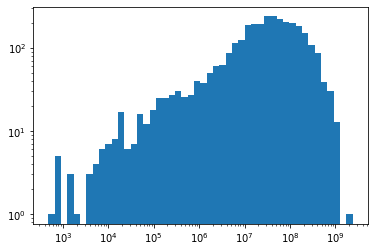

In [7]:
min_value_w_gross = movie_data['w_gross'].min()
max_value_w_gross = movie_data['w_gross'].max()

print('minimum value of the w_gross:'+str(min_value_w_gross))
print('maximum value of the w_gross:'+str(max_value_w_gross))

#generate sequence of exponentially increasing numbers

end_value = np.log(max_value_w_gross)/np.log(min_value_w_gross)

exponential_bins = np.logspace(1,end_value,base=min_value_w_gross).astype(int)
exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
mean_values = list(mean_values)
print('Mean values:',mean_values)

#mean values as input for bucket limits
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.show()
#in a log-log scale
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.yscale('log')
plt.xscale('log')
plt.show()

# scatter plot of w_gross and imdb_votes

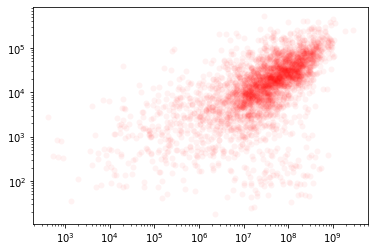

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

We can see that there is a direct corellation between those two columns.

# attributes correlation

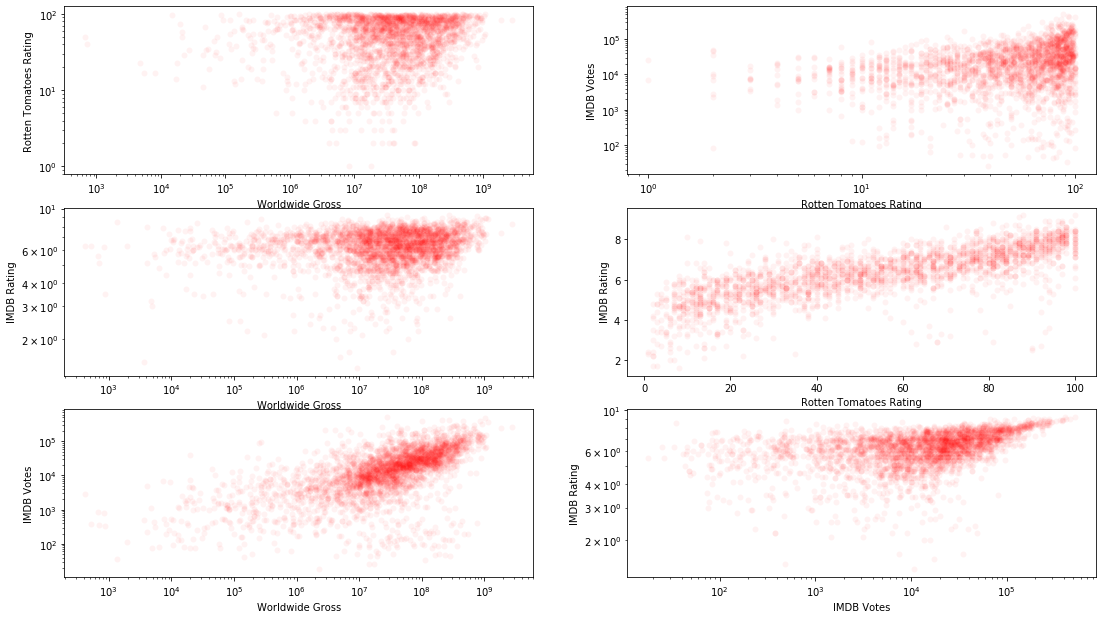

In [9]:
fig, ax = plt.subplots(3, 2)

#increase figure size
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(movie_data['w_gross'] ,movie_data['tomatoes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 0].set_xlabel('Worldwide Gross')
ax[0, 0].set_ylabel('Rotten Tomatoes Rating')
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log')

ax[1, 0].plot(movie_data['w_gross'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 0].set_xlabel('Worldwide Gross')
ax[1, 0].set_ylabel('IMDB Rating')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')

ax[2, 0].plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 0].set_xlabel('Worldwide Gross')
ax[2, 0].set_ylabel('IMDB Votes')
ax[2, 0].set_xscale('log')
ax[2, 0].set_yscale('log')

ax[0, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 1].set_xlabel('Rotten Tomatoes Rating')
ax[0, 1].set_ylabel('IMDB Votes')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[1, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 1].set_xlabel('Rotten Tomatoes Rating')
ax[1, 1].set_ylabel('IMDB Rating')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[2, 1].plot(movie_data['imdb_votes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 1].set_xlabel('IMDB Votes')
ax[2, 1].set_ylabel('IMDB Rating')
ax[2, 1].set_xscale('log')
ax[2, 1].set_yscale('log')


plt.show()

## pearson corelation
for example w_gross with US Gross have a corellation of 0.939742

In [10]:
print(movie_data.corr(method='pearson'))

             US Gross   w_gross  p_budget  tomatoes  imdb_rating  imdb_votes
US Gross     1.000000  0.939616  0.624038  0.181010     0.197641    0.551073
w_gross      0.939616  1.000000  0.666867  0.159963     0.198313    0.551272
p_budget     0.624038  0.666867  1.000000 -0.088740     0.015312    0.339755
tomatoes     0.181010  0.159963 -0.088740  1.000000     0.743118    0.335410
imdb_rating  0.197641  0.198313  0.015312  0.743118     1.000000    0.467389
imdb_votes   0.551073  0.551272  0.339755  0.335410     0.467389    1.000000


## Spearman corelation

In [11]:
print(movie_data.corr(method='spearman'))

             US Gross   w_gross  p_budget  tomatoes  imdb_rating  imdb_votes
US Gross     1.000000  0.948275  0.647926  0.125011     0.114899    0.621936
w_gross      0.948275  1.000000  0.678004  0.110353     0.143145    0.654215
p_budget     0.647926  0.678004  1.000000 -0.220126    -0.088008    0.432018
tomatoes     0.125011  0.110353 -0.220126  1.000000     0.776512    0.312256
imdb_rating  0.114899  0.143145 -0.088008  0.776512     1.000000    0.463309
imdb_votes   0.621936  0.654215  0.432018  0.312256     0.463309    1.000000


In [12]:
from scipy import stats

df_p = pd.DataFrame()  # Matrix of p-values
for x in movie_data.columns:
    for y in movie_data.columns:
        #return pearson correlation coefficient and p-value for testing non-correlation
        corr = stats.pearsonr(movie_data[x], movie_data[y])
        df_p.loc[x,y] = corr[1]
print(df_p)

TypeError: unsupported operand type(s) for +: 'float' and 'str'